## Load Libraries and Dataset

In [12]:
# import required libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import sqlite3
import string

In [13]:
# Import dataset

df = pd.read_csv('train_preprocess.tsv.txt',sep='\t',names=['Tweet','Label'])
df.head()

,Tweet,Label
0,warung ini dimiliki oleh pengusaha pabrik tahu...,positive
1,mohon ulama lurus dan k212 mmbri hujjah partai...,neutral
2,lokasi strategis di jalan sumatera bandung . t...,positive
3,betapa bahagia nya diri ini saat unboxing pake...,positive
4,duh . jadi mahasiswa jangan sombong dong . kas...,negative


In [14]:
# Row and column check

df.shape

(11000, 2)

In [15]:
# General info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11000 entries, 0 to 10999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Tweet   11000 non-null  object
 1   Label   11000 non-null  object
dtypes: object(2)
memory usage: 172.0+ KB


Dataset terdiri dari 11.000 baris dengan 2 kolom dimana tipe datanya adalah object

## Missing and Duplicated Value Check

In [16]:
# Missing value check

df.isna().sum()

Tweet    0
Label    0
dtype: int64

In [17]:
# Duplicated data check

print('terdapat {} data yang terduplikasi'.format(df.duplicated().sum()))

terdapat 67 data yang terduplikasi


In [18]:
# Drop duplicated data

df = df.drop_duplicates()
print('terdapat {} data yang terduplikasi'.format(df.duplicated().sum()))
print('data yang terduplikasi telah didrop')

terdapat 0 data yang terduplikasi
data yang terduplikasi telah didrop


In [19]:
# Row and column check

df.shape

(10933, 2)

dari dataset ini, tidak ditemukan missing value di dalamnya, namun setelah dicek terdapat data yang terduplikasi sebanyak 67 baris

# EDA

In [20]:
# Label distribution

df.Label.value_counts()

positive    6383
negative    3412
neutral     1138
Name: Label, dtype: int64

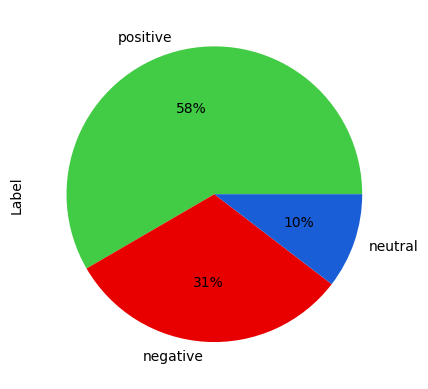

In [23]:
# Visualize it

df.Label.value_counts().plot.pie(autopct='%1.0f%%', colors = ['#42cb45','#e80000','#195dd7'])
plt.show()

58% tweet dari dataset ini berlabelkan positif tweet, 31% berlabelkan negatif, dan 10% berlabelkan netral. 

## Text Processing

Next, we will do text preprocessing so that the text data becomes even more structured. For this, we will use RegEx library.

In [26]:
# Convert to lowercase

def lowercase(s):
    return s.lower()

In [27]:
# Remove punctuation

def punctuation(s):
    s = re.sub('[^0-9a-zA-Z]+', ' ', s)
    s = re.sub('^rt',' ', s)
    s = re.sub(r'\d+', '', s)
    s = re.sub('user',' ', s)
    s = re.sub(r':', ' ', s)
    s = re.sub('((www\.[^\s]+)|(https?://[^\s]+)|(http?://[^\s]+))',' ', s)
    s = re.sub(' +', ' ', s)
    s = re.sub('\n',' ',s)
    s = re.sub(r'pic.twitter.com.[\w]+', ' ', s)
    return s

In [28]:
# Create database connection

conn = sqlite3.connect('database.db')

In [29]:
# Import kamusalay

kamusalay = pd.read_csv('new_kamusalay.csv',encoding='latin-1',names=['alay','normal'])

# Connect kamusalay to database

kamusalay.to_sql('kamusalay', conn, if_exists='replace',index=False)
kamusalay=pd.DataFrame(kamusalay)
kamusalay

,alay,normal
0,anakjakartaasikasik,anak jakarta asyik asyik
1,pakcikdahtua,pak cik sudah tua
2,pakcikmudalagi,pak cik muda lagi
3,t3tapjokowi,tetap jokowi
4,3x,tiga kali
...,...,...
15162,mendikbud,menteri pendidikan dan kebudayaan
15163,mendag,menteri perdagangan
15164,menaker,menteri tenaga kerja
15165,memetwit,mentwit


In [33]:
# Retrieve kamusalay

db = sqlite3.connect("C:/Users/ksreni/belajar_ds/DSC_9_Kelompok 1_Challenge Platinum/database.db", check_same_thread = False)
q_kamusalay = 'SELECT * FROM kamusalay'
t_kamusalay = pd.read_sql_query(q_kamusalay, db)

In [34]:
# Change non standard words to become more standard words

alay_dict = dict(zip(t_kamusalay['alay'], t_kamusalay['normal']))
def alay_to_normal(s):
    for word in alay_dict:
        return ' '.join([alay_dict[word] if word in alay_dict else word for word in s.split(' ')])

In [35]:
# Copy dataset

data = df.copy()
data.head()

,Tweet,Label
0,warung ini dimiliki oleh pengusaha pabrik tahu...,positive
1,mohon ulama lurus dan k212 mmbri hujjah partai...,neutral
2,lokasi strategis di jalan sumatera bandung . t...,positive
3,betapa bahagia nya diri ini saat unboxing pake...,positive
4,duh . jadi mahasiswa jangan sombong dong . kas...,negative


In [36]:
# Create text cleansing function

def cleansing(s):
    s = lowercase(s)
    s = punctuation(s)
    s = alay_to_normal(s)
    return s

In [37]:
# Apply cleansing function to dataset

data['Tweet'] = data['Tweet'].apply(cleansing)
data.head()

,Tweet,Label
0,warung ini dimiliki oleh pengusaha pabrik tahu...,positive
1,mohon ulama lurus dan k mmbri hujjah partai ap...,neutral
2,lokasi strategis di jalan sumatra bandung temp...,positive
3,betapa bahagia nya diri ini saat unboxing pake...,positive
4,aduh jadi mahasiswa jangan sombong dong kasih ...,negative


In [38]:
# Old tweet and new tweet comparation

print('Old tweet: {}'.format(df['Tweet'].iloc[28]))
print('\t')
print('New tweet: {}'.format(data['Tweet'].iloc[28]))

Old tweet: pdip sebut ridwan kamil menang karena berbaju merah
	
New tweet: partai demokrasi indonesia perjuangan sebut ridwan kamil menang karena berbaju merah


## Data Storing

In [39]:
# Connect cleaned data to database

data.to_sql('data', conn, if_exists='replace',index=False)
data=pd.DataFrame(data)
data

,Tweet,Label
0,warung ini dimiliki oleh pengusaha pabrik tahu...,positive
1,mohon ulama lurus dan k mmbri hujjah partai ap...,neutral
2,lokasi strategis di jalan sumatra bandung temp...,positive
3,betapa bahagia nya diri ini saat unboxing pake...,positive
4,aduh jadi mahasiswa jangan sombong dong kasih ...,negative
...,...,...
10993,f demokrat dorong upaya kemandirian energi nas...,neutral
10994,tidak bosan,positive
10996,enak rasa masakan nya apalagi kepiting yang me...,positive
10998,pagi pagi di tol pasteur sudah macet parah bik...,negative


In [40]:
# Close the database

conn.commit()
conn.close()